# Coupled Qubits: Secular Approximation Breakdown
Two qubits with exchange coupling J; when splittings become quasi-degenerate, Redfield secularization can fail.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, tensor, sigmaz, sigmax, qeye, brmesolve, OhmicEnvironment

from diagnostics import trajectory_min_eigs
from plotting import style
style()

In [3]:
w1=1.0; w2=1.05

J=0.4  # comparable to decay -> near secular edge

sz=sigmaz(); sx=sigmax(); I=qeye(2)

H0=0.5*w1*tensor(sz,I)+0.5*w2*tensor(I,sz)+J*(tensor(sx,sx))  # simple XX coupling

A1=tensor(sz,I)
A2=tensor(I,sz)

bath=OhmicEnvironment(T=1e-3, wc=10.0, alpha=0.04, s=1.0)

psi0=tensor(basis(2,0), basis(2,1))

tlist=np.linspace(0,50,400)

a_ops=[[A1,bath],[A2,bath]]

sol=brmesolve(H0, psi0, tlist, a_ops=a_ops, sec_cutoff=-1)

c:\Users\leopo\anaconda3\envs\redfield\Lib\site-packages\qutip\utilities.py:55: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / w_th) - 1)


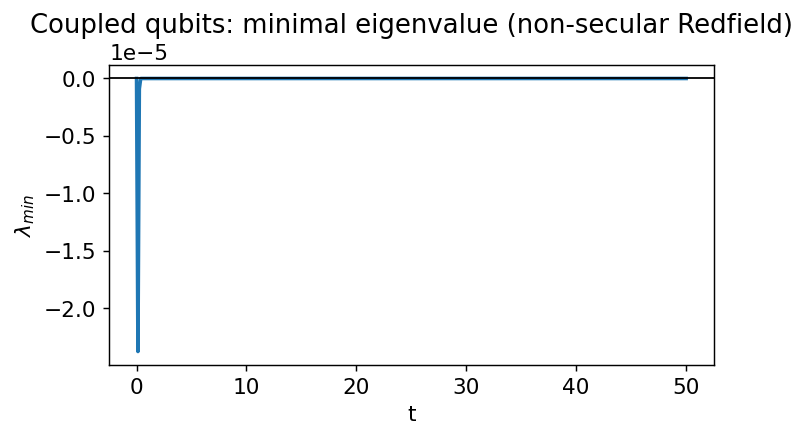

In [4]:
min_eigs=trajectory_min_eigs(sol.states)

plt.figure(figsize=(6,3))

plt.plot(tlist,min_eigs)

plt.axhline(0,color='k',lw=1)

plt.xlabel('t')

plt.ylabel(r'$\lambda_{min}$')

plt.title('Coupled qubits: minimal eigenvalue (non-secular Redfield)')

plt.show()

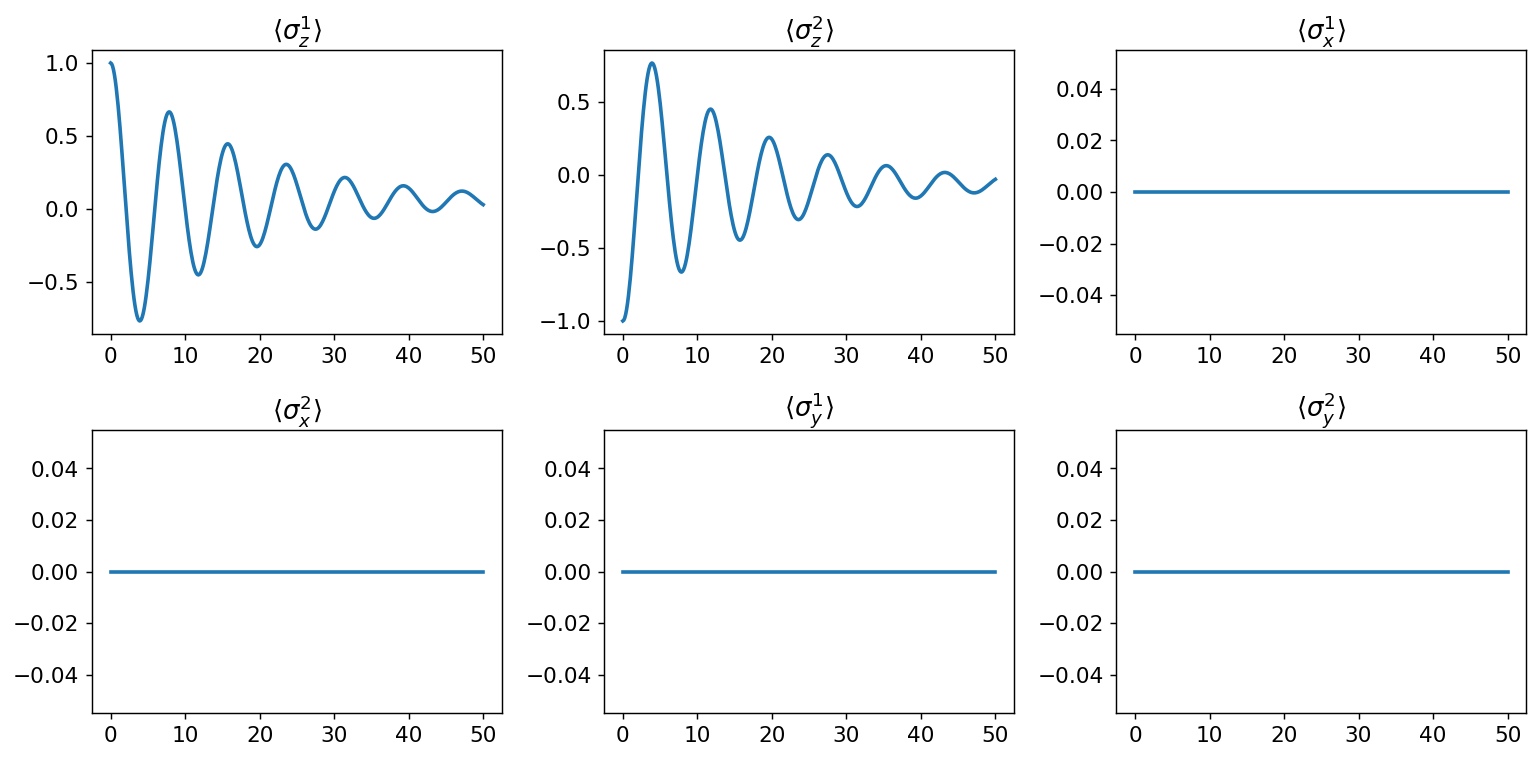

In [40]:
from qutip import expect, sigmay

sz1 = tensor(sigmaz(), qeye(2))
sz2 = tensor(qeye(2), sigmaz())
sx1 = tensor(sigmax(), qeye(2))
sx2 = tensor(qeye(2), sigmax())
sy1 = tensor(sigmay(), qeye(2))
sy2 = tensor(qeye(2), sigmay())

exp_sz1 = expect(sz1, sol.states)
exp_sz2 = expect(sz2, sol.states)
exp_sx1 = expect(sx1, sol.states)
exp_sx2 = expect(sx2, sol.states)
exp_sy1 = expect(sy1, sol.states)
exp_sy2 = expect(sy2, sol.states)

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes[0,0].plot(tlist, exp_sz1)
axes[0,0].set_title(r'$\langle \sigma_z^1 \rangle$')
axes[0,1].plot(tlist, exp_sz2)
axes[0,1].set_title(r'$\langle \sigma_z^2 \rangle$')
axes[0,2].plot(tlist, exp_sx1)
axes[0,2].set_title(r'$\langle \sigma_x^1 \rangle$')
axes[1,0].plot(tlist, exp_sx2)
axes[1,0].set_title(r'$\langle \sigma_x^2 \rangle$')
axes[1,1].plot(tlist, exp_sy1)
axes[1,1].set_title(r'$\langle \sigma_y^1 \rangle$')
axes[1,2].plot(tlist, exp_sy2)
axes[1,2].set_title(r'$\langle \sigma_y^2 \rangle$')
plt.tight_layout()
plt.show()